## Tarea 13 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 11 de diciembre.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

Una de las debilidades de `K-Means` es que solo funciona bien si los datos se pueden agrupar en una forma globular o esférica. Además, debemos asignar el número de clusters, `k`, a priori; esto puede ser un problema si no tenemos conocimiento previo sobre cuántos clusters esperamos encontrar.

En esta tarea veremos dos  enfoques alternativos para el clustering, el clustering jerárquico y el clustering basado en la  densidad.

### Clustering jerárquico

Una buena característica del clustering jerárquico es que podemos visualizar los resultados como un dendrograma, un árbol jerárquico. Usando la visualización, podemos decidir qué tan "profundo" queremos agrupar el conjunto de datos estableciendo un umbral de "profundidad". En otras palabras, no es necesario que tomemos una decisión sobre la cantidad de clusters por adelantado.

Además, podemos distinguir entre 2 enfoques principales para el clustering jerarquico: clustering divisivo y el clustering aglomerado. En el clustering aglomerado, comenzamos con una sola muestra de nuestro conjunto de datos y lo fusionamos de manera iterativa con otras muestras para formar clusters. 

Podemos entender esta idea como un enfoque de abajo hacia arriba para construir un dendrograma de clustering.
Sin embargo, en el clustering divisivo, comenzamos con el conjunto de datos completo como un cluster y lo dividimos de forma iterativa en subclusters más pequeños, un enfoque de arriba hacia abajo.

#### Single and complete linkage

Ahora, la siguiente pregunta es cómo medimos la similitud entre las muestras. Un enfoque es la métrica de distancia euclidiana familiar que ya usamos a través del algoritmo K-Means.

Sin embargo, esa es la distancia entre 2 muestras. ¿Cómo calculamos la similitud entre los subclusters de muestras para decidir qué clusters se fusionarán al construir el dendrograma? Es decir, nuestro objetivo es fusionar de forma iterativa los pares de clusters más similares hasta que solo quede un único cluster grande. Hay muchos enfoques diferentes para esto, por ejemplo de single and complete linkage.

En un single linkage, tomamos el par de las muestras más similares (por ejemplo, basadas en la distancia euclidiana) en cada cluster, y combinamos los dos clusters que tienen los 2 miembros más similares en un clusters nuevo y más grande.

En el caso de complete linkage, comparamos los pares de los dos miembros más diferentes de cada clusters entre sí, y combinamos los 2 clusters donde la distancia entre sus 2 miembros más diferentes es la más pequeña.

Para ver el enfoque de clustering jerárquico y aglomerado en acción, usemos el familiar conjunto de datos Iris: simulando que no conocemos las verdaderas etiquetas de clase y queremos averiguar la cantidad de especies diferentes que tiene:


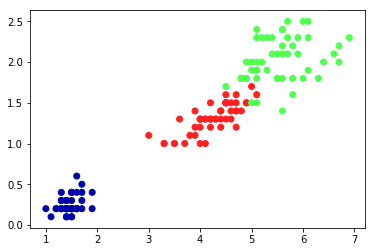

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
n_muestras, n_caracteristicas = X.shape

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm3)

Comenzamos con algunos clustering de exploración, visualizando el dendrograma de clustering usando las funciones de `linkage` y `dendrogram` de SciPy:

Text(0,0.5,'Distancia Euclidiana')

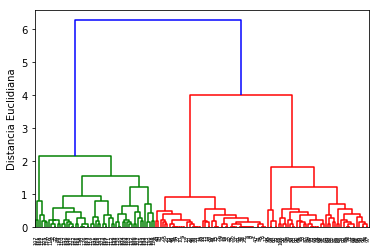

In [3]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(X, 
                   metric='euclidean',
                   method='complete')
dendr = dendrogram(clusters)
plt.ylabel('Distancia Euclidiana')

A continuación, utilicemos el estimador `AgglomerativeClustering` de scikit-learn y dividamos el conjunto de datos en 3 clusters. 

In [4]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')

prediccion = ac.fit_predict(X)
print('Etiqueta de clusters: %s\n' % prediccion)


Etiqueta de clusters: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



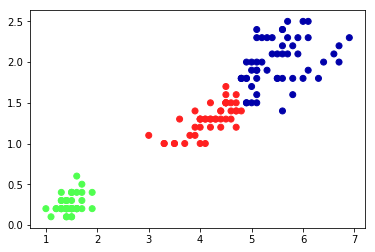

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=prediccion, cmap=cm3)

### DBSCAN

Otro enfoque útil en clustering es `Density-based Spatial Clustering of Applications with Noise` (DBSCAN). En esencia, podemos pensar en DBSCAN como un algoritmo que divide el conjunto de datos en un subclusters basado en regiones densas de puntos.

En DBSCAN, distinguimos entre 3 "puntos" diferentes:

* Puntos centrales: Un punto central es un punto que tiene al menos un número mínimo de otros puntos (MinPts) en su radio épsilon.
* Puntos de borde: un punto de borde es un punto que no es un punto central, ya que no tiene suficientes MinPts en su vecindario, pero se encuentra dentro del radio épsilon de un punto central.
* Puntos de ruido: Todos los demás puntos que no son puntos centrales ni puntos de borde.


![Sebastian-Ratchka-Machine learning with Python](DBSCAN.png)

Una buena característica de DBSCAN es que no tenemos que especificar un número de cluster por adelantado. Sin embargo, requiere la configuración de hiperparámetros adicionales, como el valor para MinPts y el radio épsilon.

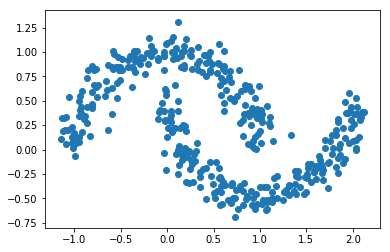

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400,
                  noise=0.1,
                  random_state=1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Etiquetas predichas:
 [ 0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  0  0  1  1  0  1  0  0  0
  1  1  0  0  0  0  1  1  1  0  1  1  1  1  0  1  0  0  1  1  0  1  0  0
  0  0  1  0  0  1  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0  0  1
  0  0  1  0  1  1  1  0  1  1  0 -1  1  1  0  0  0  1  1  0  0  0  1  0
  0  0  0  1  1  0  1  1  1  0  1  0  0  0  1  0  1  0  1  1  0  0  1  0
  1  1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  1  1  1  0  1  1  1  1
  1  1  1  1  1  1  0  1  1  1  0  0  1  1  1  0  1  0  0  1  0  1  1  0
  1  0  0  0  0  0  1  1  0  1  1  1  1  0  1  0  1  1  1  1  0  1  0  0
  0  1  0  1  1  0  1  1  0  1  0  0  0  1  1  1  0  1  0  1  0  0  0  1
  0  1  0  1  1  1  1  0  1  0  0  0  0  0  0  1  0  1  0  1  1 -1  0  0
  1  1  1  1  1  1  1  0  1  1  0  1  1  0  1  0  1  0  0  0  0  0  0  1
  0  0  0  1  1  1  1  0 -1  0  1  1  1  1  1  0  1  0  1  0  1  1  1  1
  1  0  1  0  1  0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  1  0  1  1
  0  0  0  1  1  0  0  1  1  

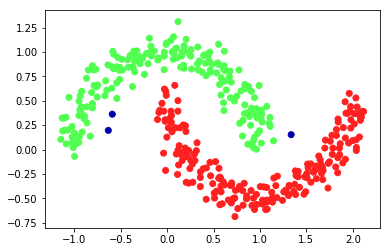

In [7]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=10,
            metric='euclidean')
prediccion = db.fit_predict(X)
print("Etiquetas predichas:\n", prediccion)
plt.scatter(X[:, 0], X[:, 1], c=prediccion, cmap=cm3)


### Ejercicio

Usando el siguiente conjunto de datos, dos círculos concéntricos, experimenta con los tres algoritmos de clustering : `KMeans`,` Agglomerative Clustering` y `DBSCAN`. ¿Qué algoritmo  reproduce  o descubre la estructura oculta mejor? ¿Puedes explicar por qué este algoritmo en particular es una buena opción mientras que los otros 2 "fallan"?

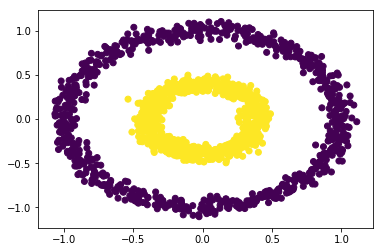

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1500, 
                    factor=.4, 
                    noise=.05)
plt.scatter(X[:, 0], X[:, 1], c=y);


In [9]:
# Tu solucion